In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('C:/Users/고유경/Desktop/대외활동/투빅스/강의자료/3주차/과제참고자료/Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
#결측치 확인(없을거같긴한데 해야될거같아서,,,ㅎ)
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

역시 없었다..!

In [9]:
#계수간 상관관계 살펴보기
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


customerID는 인덱스나 다름 없으므로 없애고 다시보자

In [10]:
new_data = data.iloc[:,1:]
new_data.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


음.. 상관관계가 그리 커보이진 않다

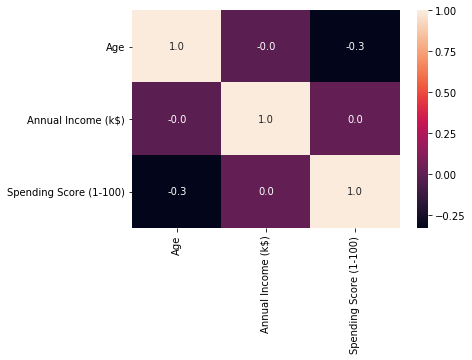

In [11]:
#히트맵으로 상관관계 시각화 해보자
sns.heatmap(new_data.corr(),annot=True,fmt='.1f')
plt.show()

In [12]:
new_data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [13]:
# 그래프에서 한글을 사용하기 위해 한글폰트를 적용
plt.style.use('seaborn') 
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

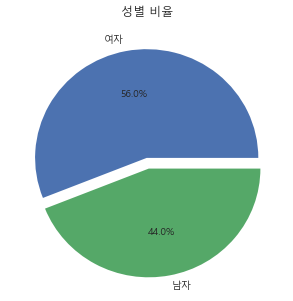

In [14]:
#파이차트로 성별 비율 나타내보기
explode=[0, 0.1]
plt.figure(figsize=(5,5))
plt.pie(new_data.Gender.value_counts().values, explode = explode, labels=['여자','남자'], autopct='%1.1f%%')
plt.title('성별 비율')
plt.show()

여자 비율이 더 높다

In [15]:
new_data.Age.value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
36     6
38     6
50     5
48     5
29     5
21     5
20     5
34     5
18     4
28     4
59     4
24     4
67     4
54     4
39     3
25     3
33     3
22     3
37     3
43     3
68     3
45     3
46     3
60     3
41     2
57     2
66     2
65     2
63     2
58     2
26     2
70     2
42     2
53     2
52     2
51     2
44     2
55     1
64     1
69     1
56     1
Name: Age, dtype: int64

음.. 시각화를 해보자!

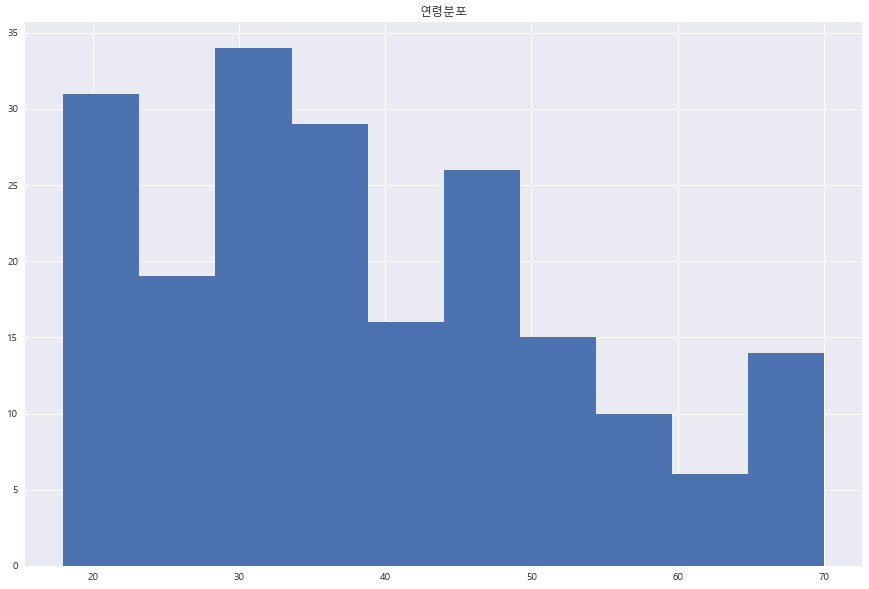

In [16]:
#연령별 분포 히스토그램으로 시각화
new_data.Age.hist(figsize=(15,10))
plt.title('연령분포')
plt.show()

상대적으로 젊은 세대 비중이 더 크다

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1800x720 with 0 Axes>

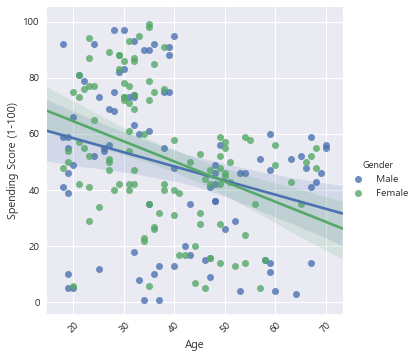

In [17]:
#나이 대비 spending score 분포 확인 
plt.figure(figsize=(25,10))
sns.lmplot(x = "Age", y = "Spending Score (1-100)",hue = 'Gender', data = new_data)
plt.xticks(rotation=45)
plt.show()

분포가 의미 있는 관계를 찾기엔 힘들어 보임

In [18]:
#Female spending score 최대,최소,평균,표준편차 
print('Max  :',max(new_data[new_data['Gender']=='Female']['Spending Score (1-100)']))
print('Min  :',min(new_data[new_data['Gender']=='Female']['Spending Score (1-100)']))
print('Mean :',np.mean(new_data[new_data['Gender']=='Female']['Spending Score (1-100)']))
print('Std  :',np.std(new_data[new_data['Gender']=='Female']['Spending Score (1-100)']))

Max  : 99
Min  : 5
Mean : 51.526785714285715
Std  : 24.007052468801657


In [19]:
#Male Annual Income 최대,최소,평균,표준편차 
print('Max  :',max(new_data[new_data['Gender']=='Male']['Spending Score (1-100)']))
print('Min  :',min(new_data[new_data['Gender']=='Male']['Spending Score (1-100)']))
print('Mean :',np.mean(new_data[new_data['Gender']=='Male']['Spending Score (1-100)']))
print('Std  :',np.std(new_data[new_data['Gender']=='Male']['Spending Score (1-100)']))

Max  : 97
Min  : 1
Mean : 48.51136363636363
Std  : 27.737812359739767


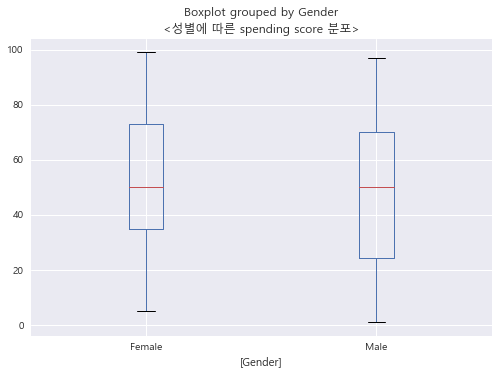

In [20]:
#boxplot으로 시각화
new_data[['Spending Score (1-100)','Gender']].boxplot(by='Gender')
plt.title('<성별에 따른 spending score 분포>')
plt.show()

여자가 조오금 더 높아보임

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1800x720 with 0 Axes>

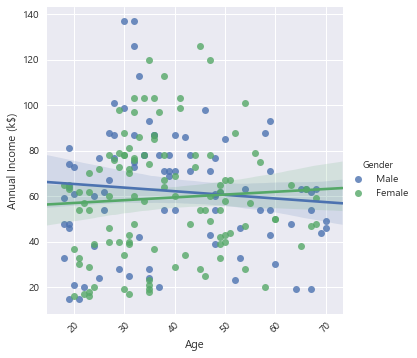

In [21]:
#나이 대비 Annual income 분포 확인 
plt.figure(figsize=(25,10))
sns.lmplot(x = "Age", y = "Annual Income (k$)",hue = 'Gender', data = new_data)
plt.xticks(rotation=45)
plt.show()

이 그래프로는 의미있는 인사이트를 찾기가 어려울듯

In [22]:
#Female Annual Income 최대,최소,평균,표준편차 
print('Max  :',max(new_data[new_data['Gender']=='Female']['Annual Income (k$)']))
print('Min  :',min(new_data[new_data['Gender']=='Female']['Annual Income (k$)']))
print('Mean :',np.mean(new_data[new_data['Gender']=='Female']['Annual Income (k$)']))
print('Std  :',np.std(new_data[new_data['Gender']=='Female']['Annual Income (k$)']))

Max  : 126
Min  : 16
Mean : 59.25
Std  : 25.8955663607278


In [23]:
#Male Annual Income 최대,최소,평균,표준편차 
print('Max  :',max(new_data[new_data['Gender']=='Male']['Annual Income (k$)']))
print('Min  :',min(new_data[new_data['Gender']=='Male']['Annual Income (k$)']))
print('Mean :',np.mean(new_data[new_data['Gender']=='Male']['Annual Income (k$)']))
print('Std  :',np.std(new_data[new_data['Gender']=='Male']['Annual Income (k$)']))

Max  : 137
Min  : 15
Mean : 62.22727272727273
Std  : 26.486586344758496


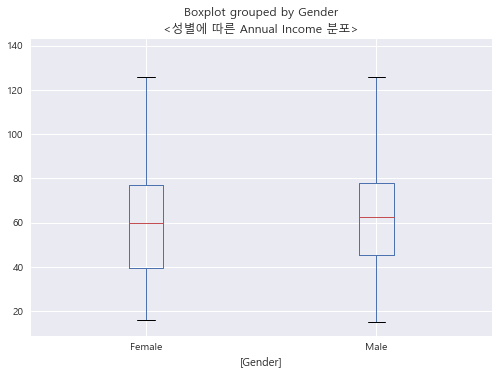

In [24]:
#boxplot으로 시각화
new_data[['Annual Income (k$)','Gender']].boxplot(by='Gender')
plt.title('<성별에 따른 Annual Income 분포>')
plt.show()

거의 비슷해서 시각화해도 차이 잘 안드러남

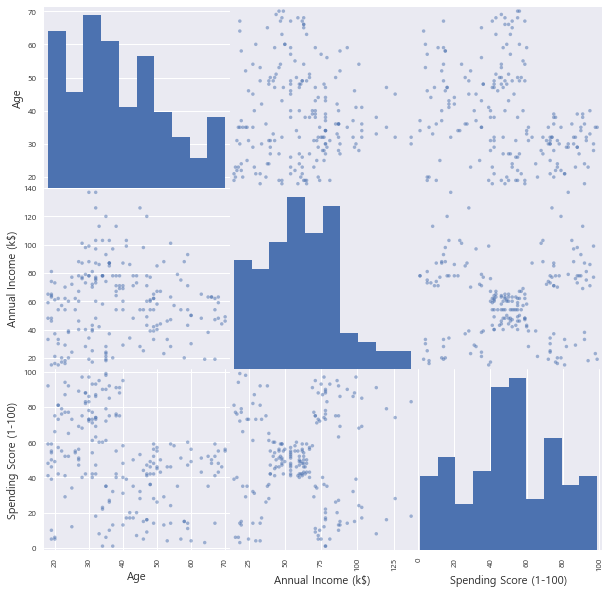

<Figure size 576x396 with 0 Axes>

In [25]:
#scatterplot으로 데이터들 나타내보기
pd.plotting.scatter_matrix(new_data,figsize=(10,10))
plt.figure()
plt.show()

## Encoding

In [26]:
# Male은 0, Female은 1로 인코딩 하자
new_data['Gender'][new_data['Gender'] == 'Male'] = 0
new_data['Gender'][new_data['Gender'] == 'Female'] = 1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
# 확인하자
new_data.Gender

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: object

In [28]:
new_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


## Hierarchical Clustering
생각보다 이해하는데 어려움이 있어서..ㅜ 구글 코드를 참고해서 공부하며 작성해보았습니당

+타겟변수가 명확하게 지정된게 아니라서 군집을 나누기가 애매하여 PCA를 배웠다면 차원축소 먼저 진행했을텐데 아직 안배웠기 때문에 우선은 gender, age, annual income, spending score 중 임의로 2개 변수를 골라가면서 그래프로 찍어보기로 하였습니다.

In [58]:
#age, annual income 열 뽑아서 새로운 데이터셋 형성
data1 = new_data.iloc[:,[1,2]]
data1.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [59]:
#스케일링
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #정규화를 하자!
reduced_data = scaler.fit_transform(data1) # 스케일링을 해주자!

In [60]:
reduced_data = pd.DataFrame(reduced_data, columns = ['Age','Annual_Income'])
reduced_data.head()

,Age,Annual_Income
0,-1.424569,-1.738999
1,-1.281035,-1.738999
2,-1.352802,-1.700830
3,-1.137502,-1.700830
4,-0.563369,-1.662660


In [61]:
print(max(reduced_data.Age))
print(min(reduced_data.Age))
print(max(reduced_data.Annual_Income))
print(min(reduced_data.Annual_Income))

2.2355323833815683
-1.49633547972731
2.9176711658902788
-1.7389991930659485


In [62]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

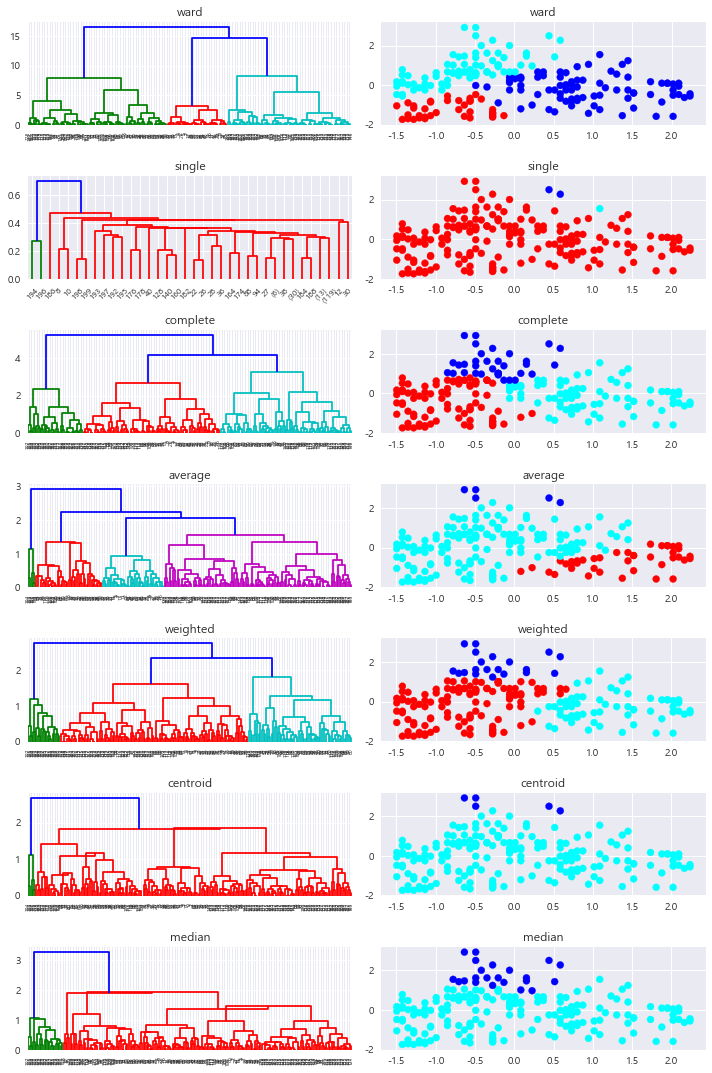

In [63]:
#method 다 써보자
methods=['ward','single','complete','average','weighted','centroid','median']

plot_id=0
for method in methods:
    cl=linkage(reduced_data,method=method)
    
    for i in ['dendrogram','clusters']:
        if i=='dendrogram':
            plot_id+=1 #그래프 위치지정
            plt.subplot(7,2,plot_id) #subplot생성
            plt.title(method) #method를 그래프 이름으로
            fig,ax=plt.gcf(),plt.gca()
            dn=dendrogram(cl,truncate_mode='level',p=15)
            plt.tight_layout()
            fig.set_size_inches(10,15)
        else: #clusters
            plot_id+=1
            labels=fcluster(cl,3,criterion='maxclust')
            #fcluster 함수를 이용하면, 특정 y값에서 클러스터링을 멈출 수 있다
            # 클러스터링한 cl 변수를 fcluster 함수에 전달하고 두번째 인자에 임계값을 3으로 지정
            plt.subplot(7,2,plot_id)
            plt.title(method)
            plt.scatter(reduced_data['Age'].values.tolist(),
                       reduced_data['Annual_Income'].values.tolist(),
                       cmap=cmap,
                       c=labels)
plt.show()            

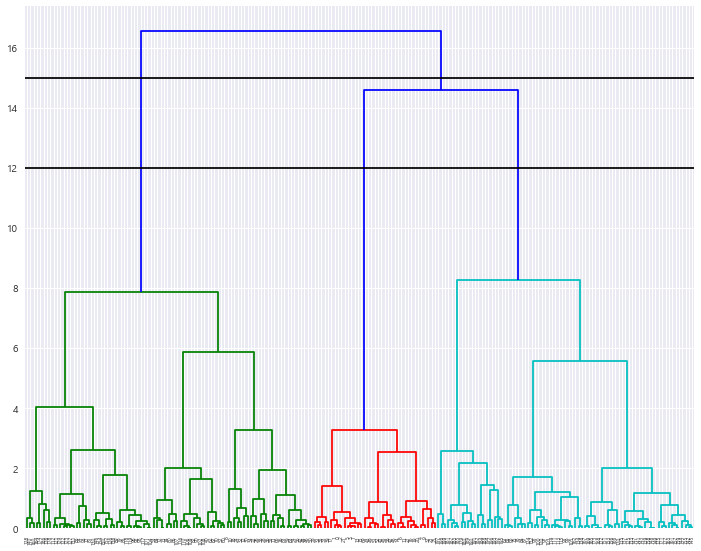

In [35]:
#ward method 덴드로그램만 다시 그려보기
cl=linkage(reduced_data,method='ward')
fig,ax=plt.gcf(),plt.gca()
dn=dendrogram(cl,truncate_mode='level',p=15)
plt.tight_layout()
fig.set_size_inches(10,8)
plt.axhline(y=15,c='k')
plt.axhline(y=12,c='k')
plt.show()

군집 개수 3개로 시각화해보자

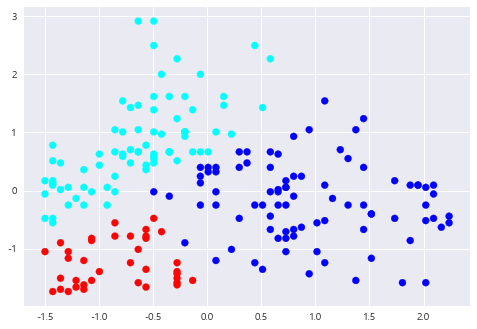

In [64]:
#scatterplot으로 클러스터링 시각화하기
cl=linkage(reduced_data,method='ward')
labels=fcluster(cl,3,criterion='maxclust')
plt.scatter(reduced_data.Age.values.tolist(),
           reduced_data.Annual_Income.values.tolist(),
           cmap=cmap,
           c=labels)
plt.show()

In [65]:
silhouette_score(reduced_data,labels)

0.39220113696886005

## K-Means Clustering

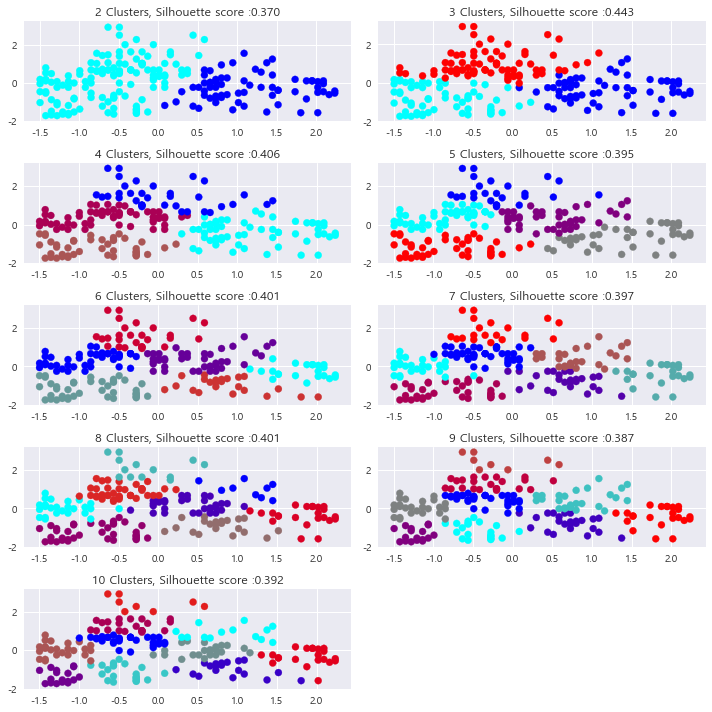

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.colors import LinearSegmentedColormap

cmap=LinearSegmentedColormap.from_list('BlRd',['blue','red','cyan']) #컬러풀한 그래프를 만들어주기 위한 색 지정

silhouette_scores=[] #실루엣스코어 리스트 생성
for i in range(2,11): #k값을 2부터 10까지 전부 돌려보면서 실루엣스코어 함께 구하기
    cl=KMeans(n_clusters=i,random_state=0)
    result=cl.fit_predict(reduced_data)
    silhouette=silhouette_score(reduced_data,result) #각 실루엣 스코어를 받아
    silhouette_scores.append(silhouette) #리스트에 넣어주기
    plt.subplot(5,2,i-1) #subplot 생성
    plt.scatter(reduced_data['Age'].values,reduced_data['Annual_Income'].values,c=result,cmap=cmap) #scatterplot
    plt.title(str(i)+' Clusters, Silhouette score :'+ str(silhouette)[:5]) #그래프마다 클러스터 개수와 실루엣스코어 명시
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()

0.5 넘는건 아무것도 없네욤... 가장 높은 실루엣스코어는 0.443으로 3 clusters

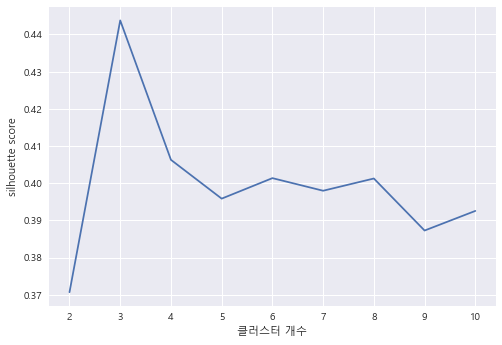

In [39]:
#클러스터 개수에 따른 실루엣 스코어 변화 추이를 시각화해보자
plt.plot([i for i in range(2,11)],silhouette_scores)
plt.xlabel('클러스터 개수')
plt.ylabel('silhouette score')
plt.show()

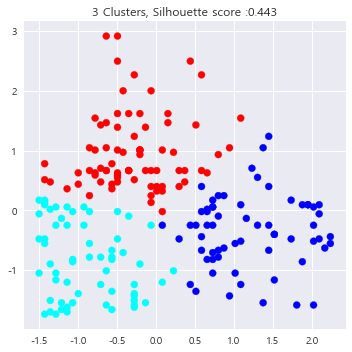

In [44]:
# 3개 클러스터 그래프만 따로 나타내기
cl=KMeans(n_clusters=3,random_state=0)
result=cl.fit_predict(reduced_data)
silhouette=silhouette_score(reduced_data,result)
plt.scatter(reduced_data['Age'].values,reduced_data['Annual_Income'].values,c=result,cmap=cmap)
plt.title(str(3)+' Clusters, Silhouette score :'+str(silhouette)[:5])
fig,ax=plt.gcf(),plt.gca()
fig.set_size_inches(5,5)
plt.tight_layout()
plt.show()

Text(0.5,1,'Elbow curve')

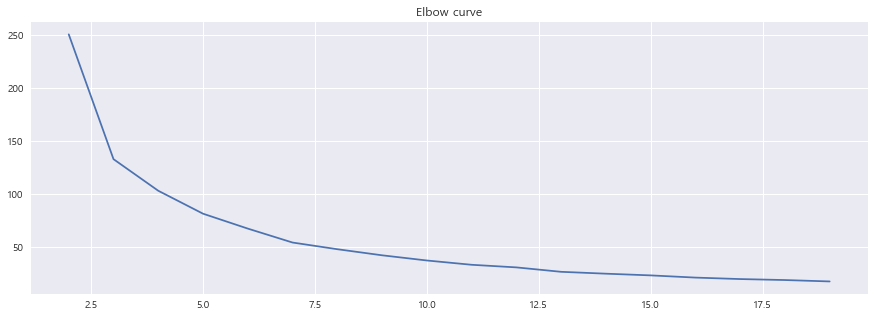

In [43]:
#이번엔 elbow point를 이용하여 최적의 군집수를 판별해보자

distorsions = []

# 군집 수 K의 변화에 따라
# Inertia Value: 군집화가 된 후에, 각 중심점에서 군집내의 데이터간의 거리를 합산한 것
# 즉, 군집의 응집도를 나타내는 값
# 이 값을 구해 그래프로 그린다!
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reduced_data)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')

# 급격하게 하강하다가 변화의 폭이 크지 않는 지점 Elbow Point를 찾는다.

얜 또 5 부근이 적당해보인다..

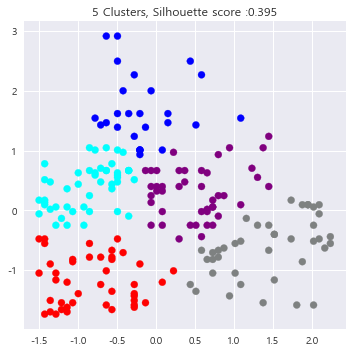

In [45]:
#군집개수 5개로 scatterplot 다시 그려보기
cl=KMeans(n_clusters=5,random_state=0)
result=cl.fit_predict(reduced_data)
silhouette=silhouette_score(reduced_data,result)
plt.scatter(reduced_data['Age'].values,reduced_data['Annual_Income'].values,c=result,cmap=cmap)
plt.title(str(5)+' Clusters, Silhouette score :'+str(silhouette)[:5])
fig,ax=plt.gcf(),plt.gca()
fig.set_size_inches(5,5)
plt.tight_layout()
plt.show()

## DBSCAN

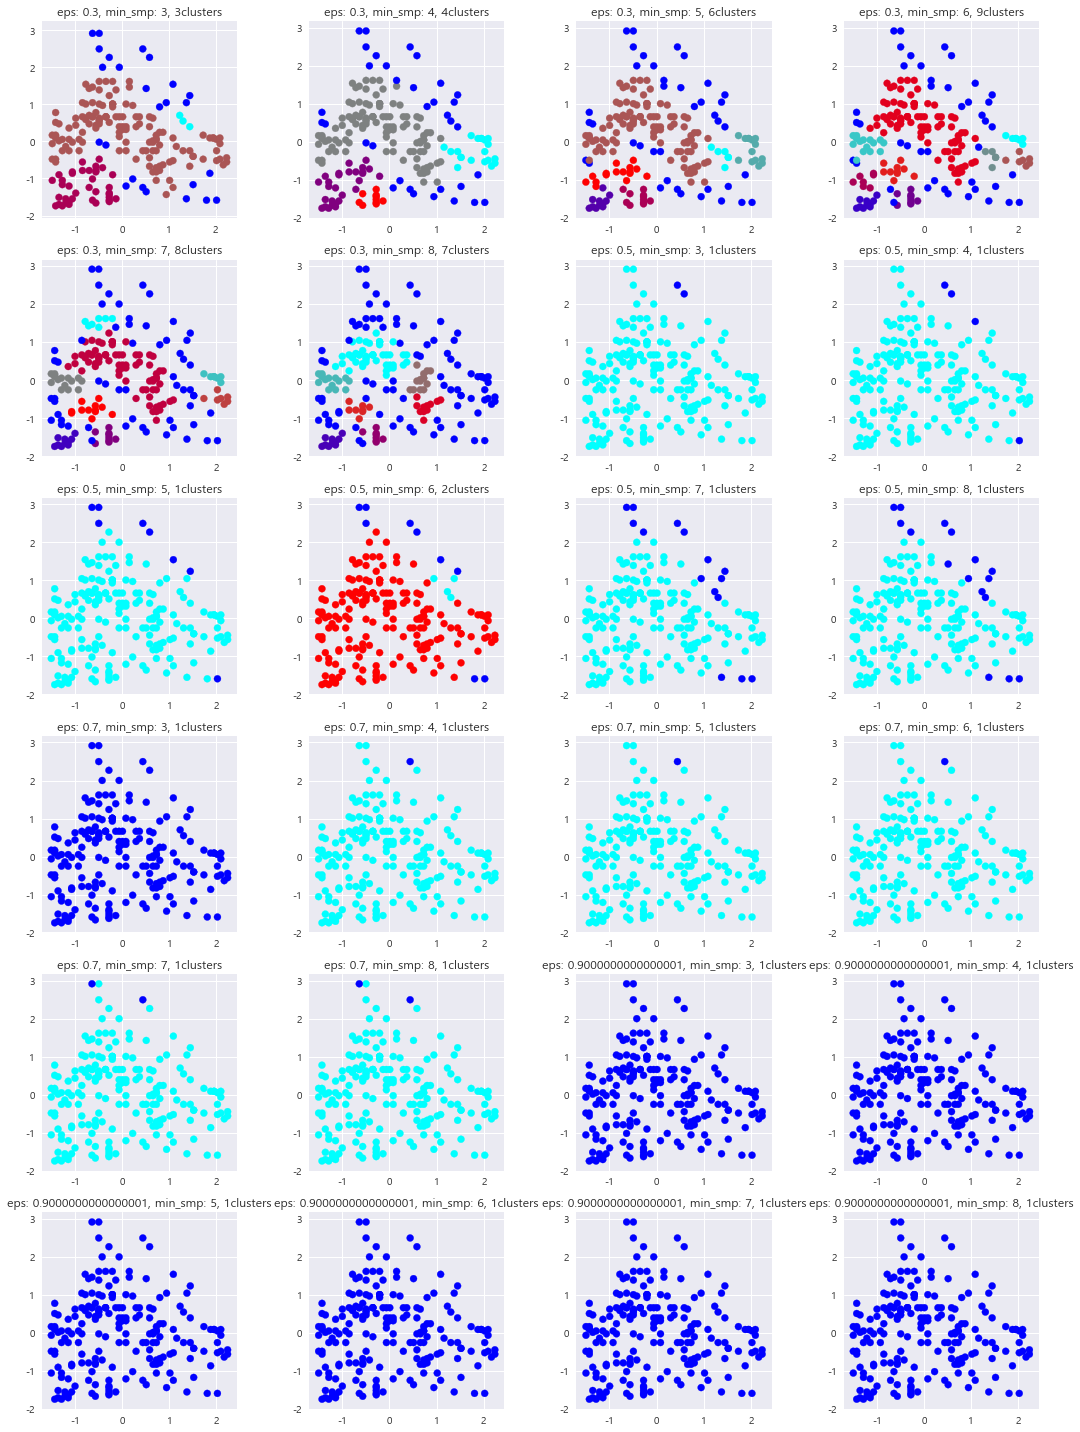

In [66]:
from sklearn.cluster import DBSCAN

#얘도 마찬가지로 eps와 minpts와 군집 수에 따라 그래프를 다 찍어보자
plot_id=0
for eps in np.arange(0.3,0.9,0.2): #eps는 0.3과 0.9사이를 0.2간격으로
    for min_samples in range(3,9): #minpts는 3~8
        plot_id+=1
        cl=DBSCAN(eps=eps,min_samples=min_samples)
        result=cl.fit_predict(reduced_data)
        n_clusters=len([c for c in list(set(result)) if c!=-1])
        plt.subplot(6,4,plot_id)
        plt.scatter(reduced_data.Age.values.tolist(),
                   reduced_data.Annual_Income.values.tolist(),
                   cmap=cmap,
                   c=result)
        fig,ax=plt.gcf(),plt.gca()
        fig.set_size_inches(15,20)
        plt.title('eps: ' + str(eps)+', min_smp: ' + str(min_samples)+ ', ' + str(n_clusters)+ 'clusters')
        plt.tight_layout()
plt.show()


직관적으로 깔끔하게 나눠진 그래프는 찾기 힘들지만 (3,1),(3,3),(3,4)에 있는 (eps:0.5, min_smp:5),(eps:0.5, min_smp:7),(eps:0.5, min_smp:8)을 보면 오른쪽 밑 파란색 이상치들만 제외한다면 두 클러스터로 나눠볼 수 있을거 같다. 

In [69]:
#그렇다면 실루엣 스코어는 (eps:0.5, min_smp:7) 경우로 구해보자
cl=DBSCAN(eps=0.5,min_samples=7)
result=cl.fit_predict(reduced_data)
silhouette_score(reduced_data,result)

0.28260803643076204

## Mean-shift clustering

In [71]:
from sklearn.cluster import MeanShift, estimate_bandwidth

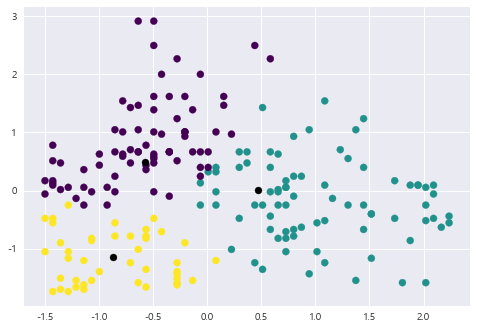

In [72]:


bandwidth = estimate_bandwidth(reduced_data, quantile=0.2, n_samples=50)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(reduced_data)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

plt.scatter(reduced_data['Age'],reduced_data['Annual_Income'], c=labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black');
plt.show()

계층군집화나 Kmean군집화와 비슷한 결과가 나왔다

In [73]:
# 실루엣스코어는?
silhouette_score(reduced_data, labels)

0.41741328256776866